Prendete una classe di 30 persone: scommettereste che ci sono almeno due persone che compiono gli anni lo stesso giorno, oppure no?

Per rispondere possiamo utilizzare il calcolo combinatorio, oppure possiamo usare un approccio più "muscolare": prendiamo una classe di 30 persone (es: i primi 30 qui davanti, in aula) e vediamo se ci sono due persone che compiono gli anni lo stesso giorno. (si prova etc). Ma basta una prova, per generalizzare? No, bisognerebbe provare con molte classi. Quello che cercheremo di fare ora è di simulare questo processo: prendere classi di 30 persone a caso, e verificare la frazione di volte che ci sono due persone che compiono gli anni lo stesso giorno. In questo modo avremo una stima della probabilità che cercavamo inizialmente. Questo approccio alla stima della probabilità si chiama, per ragioni che lasciamo alla perspicacia del lettore di intuire e/o indagare, [metodo montecarlo](https://en.wikipedia.org/wiki/Monte_Carlo_method).
Per automatizzare il processo, useremo il linguaggio Python. In particolare, lo utilizzeremo in un modo un po' diverso dal solito (che vuol dire? specificare). Lo utilizzeremo in modo _interattivo_, come se fosse una potente calcolatrice. La modalità di interazione che utilizzeremo si chiama *REPL*, che è un acronimo per *R*ead, *E*valuate, *P*rint, *L*oop.
Ma partiamo subito: cosa vuol dire *E*valuate? Ve lo mostro con un esempio:

In [1]:
1

1


Emozionante, no? Ho digitato `1`, premuto shift-enter, e l'interprete ha prodotto un `1`. Incredibile! Proviamo con qualcosa di più sfizioso:

In [2]:
1+1

2

Sempre più in alto: ho digitato `1+1` e l'output questa volta è `2`. Che succede? Succede che io scrivo un'*espressione*, e quando premo shift-enter chiedo di *valutarla*. Nel caso di espressioni aritmetiche questo vuol dire calcolarne il valore. Vedremo che ci sono casi più complicati (e interessanti).

Esercizio: scrivere l'espressione di 10 caratteri che produca il risultato più lungo (in termini di caratteri) possibile

Esempio:
`1+1+1+1+11` produce `15`, che è lungo due caratteri. Riuscite a fare di meglio? :)

[Spazio per l'esercizio]

Ok, abbiamo visto un tipo di espressione, quella con numeri e operatori aritmetici. Ce ne sono altre? (Cioè, ci sono altri elementi/operatori).

In [3]:
pow(2,3)

8

Il logaritmo come fa?

In [4]:
log(3)

NameError: name 'log' is not defined

Il logaritmo sembra non esserci. In realtà, quando carichiamo Python, abbiamo un certo numero di funzioni a disposizione, ma abbiamo anche un sacco di _librerie_ dalle quali attingere. Una di queste è [`math`](https://docs.python.org/3.5/library/math.html). Per includere una libreria:

In [5]:
import math

In [6]:
help(math)

Help on module math:

NAME
    math

MODULE REFERENCE
    http://docs.python.org/3.5/library/math
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module is always available.  It provides access to the
    mathematical functions defined by the C standard.

FUNCTIONS
    acos(...)
        acos(x)
        
        Return the arc cosine (measured in radians) of x.
    
    acosh(...)
        acosh(x)
        
        Return the inverse hyperbolic cosine of x.
    
    asin(...)
        asin(x)
        
        Return the arc sine (measured in radians) of x.
    
    asinh(...)
        asinh(x)
        
        Return the inverse hyperbolic sine of x.
    
    atan(...)
        atan(x)
        
  

Per accedere a una funzione, cioè a un _membro_ della libreria, usiamo l'operatore `.`, che ritroveremo spesso:

In [7]:
math.log10(100)

2.0

Ora vediamo un'altra libreria interessante:

In [8]:
import random

In [9]:
random.random()

0.5650673362047764

In [10]:
random.random()

0.07716766340517889

Domandona: Cosa fa la funzione `random` del modulo `random`?

In [11]:
random.randint(1,1000)

662

In [12]:
random.randint(1,1000)

139

Esercizio: secondo voi `randint` pesca un numero tra i due argomenti *compresi* o *esclusi*? In che modo cerchereste di rispondere?

Ok, quindi potremmo usare python per generare 30 numeri casuali tra 1 e 365, e verificare se ci sono due numeri uguali.
Quando usiamo spesso una funzione, c'è un modo per importarla in modo da poterla utilizzare direttamente, senza premettere il nome della libreria e il `.`:

In [13]:
from random import randint

In [14]:
randint(1, 365)

202

In [15]:
randint(1, 365)

297

Ok, ma il valore in un REPL è molto effimero. Come faccio a segnarmelo, e utilizzarlo dopo? Semplice, me lo annoto in una _variabile_:

In [16]:
a = randint(1, 365)

In [17]:
b = randint(1, 365)

In [18]:
a+b

469

In [19]:
a-b

-137

Esercizio: capire quanto vale `a` e quanto vale `b`.

Ok, ma: non si può automatizzare l'_estrazione_ di 60 numeri tra 1 e 365? Certo, e c'è più di un modo...
Pensiamo in prospettiva: quello che vorremmo fare è estrarre 30 numeri, e poi verificare che non ci si siano doppioni...
Per prima cosa chiediamoci: come faccio a ripetere `n` volte un'azione?
Entri il `for`!

In [20]:
for i in range(5):
    print(i)

0
1
2
3
4


Cose da spiegare:
* cos'è `range`
* qui sto stampando, non sto ritornando un valore (difatti, non c'è `Out`)

Ora, ci piacerebbe prendere questi valori e raccoglierli tutti in una struttura dati sulla quale poi possiamo "fare delle cose". Entrino le *liste*!

In [21]:
[1,2,3]

[1, 2, 3]

In [22]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [23]:
l = [1+2, 3+4]

Secondo voi che valore produce la valutazione delle seguenti espressioni:

```python
l[0]
l[1:2]
```


Ok, abbiamo la seguente lista:

In [24]:
l = [1,2,3,4,5,6,7,8,9,10]

Vogliamo ottenere una lista che contiene i _quadrati_ degli elementi di `l`. Come facciamo?
La notazione matematica di [descrizione degli insiemi](https://en.wikipedia.org/wiki/Set-builder_notation#More_complex_expressions_on_the_left_side_of_the_notation) ci consentirebbe di fare qualcosa del tipo:

$$
\left\{x^2 | \;x \in \{1..10\} \right\} = \{1,4,9,16,25,36,49,64,81,100\}
$$

Ecco uno dei miei (e non solo miei!) costrutti preferiti in python: le [list comprehension](http://www.secnetix.de/olli/Python/list_comprehensions.hawk)!

In [25]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Anatomia: a sinistra troviamo un'espressione, e poi un `for` che definisce un contesto. Il risultato è una lista che contiene le valutazioni dell'espressione nel contesto. Un contesto può essere creato chiamando la funzione `range`, oppure può essere un'altra lista!

In [26]:
[x**2 for x in [1,5,6]]

[1, 25, 36]

Ok, detto questo: sapreste generare una lista di numeri casuali, ciascuno tra 1 e 365?

In [27]:
[randint(1,365) for i in range(30)]

[157,
 308,
 96,
 279,
 301,
 364,
 236,
 260,
 15,
 156,
 341,
 306,
 73,
 6,
 247,
 220,
 171,
 332,
 264,
 51,
 353,
 102,
 19,
 89,
 195,
 201,
 81,
 226,
 63,
 145]

Ok, ecco la nostra istanza di classe (in termini delle scienze stocastiche questo lo chiameremmo *campione*, cioè il fortunato estratto a caso dall'urna con tutte le possibili classi del mondo).

Bene: come facciamo a vedere se ci sono due elementi uguali? Come fareste?
In Python, come spesso accade, ci sono molti modi...
Partiamo ordinando la nostra lista:

In [28]:
classe = [randint(1, 365) for _ in range(30)]

In [29]:
sorted(classe)

[5,
 20,
 22,
 48,
 55,
 58,
 61,
 71,
 75,
 96,
 113,
 119,
 119,
 135,
 148,
 160,
 180,
 182,
 188,
 189,
 200,
 204,
 214,
 218,
 226,
 288,
 296,
 320,
 355,
 358]

Ok, così è facile vedere se ci sono due elementi uguali (in generale, che complessità ha la cosa?). Però, se volessimo generare 100 classi? Dovremmo ordinare e controllare sempre e comunque "a occhio".
Dobbiamo trovare un modo automatico...
Entri `set`! 

In [30]:
{1,2,3,3}

{1, 2, 3}

&Egrave; possibile conoscere la cardinalità di una lista, o di un insieme? Certo! Entri `len`!

In [31]:
len([1,2,3])

3

In [32]:
len({1,2,3,3})

3

Si può convertire una lista in un set:

In [33]:
set([1,2,3,3])

{1, 2, 3}

Quindi, per vedere se ci sono dei duplicati in una lista, possiamo ottenere il `set` corrispondente e vederne la lunghezza:

In [34]:
len(set(classe))

29

Il `set` ha 29 elementi, quindi c'è un numero doppio (e solo uno...)

Ok, in questo modo abbiamo generato un campione, e verificato che in questo caso c'è almeno una _collisione_ tra compleanni. Ci basta questo per stimare la probabilità che in una classe qualsiasi ci sia almeno una collisione?

No, ovviamente. (ma allora, che informazione ci da, la prova?)

Per stimare la probabilità dobbiamo fare molte, molte prove (più ne facciamo, meglio è...)

Come si fa, in modo automatico? Abbiamo tutti gli elementi:

In [35]:
[len(set([randint(1, 365) for _ in range(30)])) < 30 for _ in range(1000)]

[True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Fal

Questa roba non è molto leggibile! Per renderla più amichevole, definiamo delle funzioni nostre!

In [36]:
def generate_class():
    return [randint(1, 365) for _ in range(30)]

In [37]:
generate_class()

[155,
 307,
 301,
 129,
 284,
 331,
 245,
 213,
 72,
 65,
 338,
 35,
 151,
 185,
 89,
 165,
 305,
 363,
 345,
 15,
 337,
 175,
 147,
 284,
 197,
 287,
 99,
 231,
 361,
 48]

In [38]:
def are_there_collisions(classe):
    return len(set(classe)) < 30

In [39]:
are_there_collisions(generate_class())

True

Ok, ora facciamolo per 1000 volte!

In [40]:
samples = [are_there_collisions(generate_class()) for _ in range(1000)]

Come facciamo a contare quanti `True` abbiamo? Come al solito, ci sono molti modi. Ve ne propongo uno che mi consente di mostrare un'altra cosa simpatica delle comprehension:

In [41]:
len([s for s in samples if s == True])

732

Per capire cosa abbiamo fatto, guardate qui:

In [42]:
[x for x in range(100) if x**2 < 60 and x**2 > 12]

[4, 5, 6, 7]

E guardate questo, a proposito dei due numeri che prima volevamo individuare:

In [43]:
[[a, b] for a in range (1, 365) for b in range(1, 365) if a+b == 169 and a-b == 5]

[[87, 82]]

Ok, quindi: abbiamo calcolato un'approssimazione della probabilità che in una classe di 30 persone ci siano almeno due persone che compiono gli anni lo stesso giorno. &Egrave; decisamente sopra lo 0.5, quindi su 30 persone ci conviene scommettere che ce ne siano due che compiono gli anni lo stesso giorno.

Es: qual è il numero minimo di persone per cui conviene scommettere che ce ne siano due che compiono gli anni lo stesso giorno?

In [44]:
def generate_class(n):
    return [randint(1, 365) for _ in range(n)]

def are_there_collisions(c):
    return len(set(c)) < len(c)

def estimate_collision_p(n_people, n_samples):
    samples = [are_there_collisions(generate_class(n_people)) for _ in
               range(n_samples)]
    return sum(samples)/n_samples


In [45]:
ps = [estimate_collision_p(n,10000) for n in range(22,30)]

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

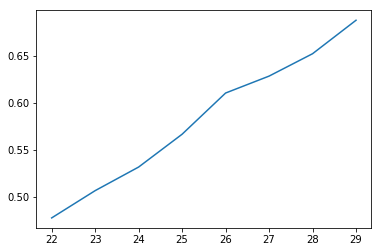

In [47]:
plt.plot(range(22,30), ps)

## References

* List comprehensions: https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions
* Montecarlo methods: [](...)
* Python documentation: []()
* Birthday paradox: []()


Argomenti trattati:
* REPL
* Espressioni
* Liste
* For
* Comprehension